In [1]:
%matplotlib inline
from pylab import *
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
from treatment_sims_2023_02_21 import *

Splikes version  0.1.2
Plasticnet version  0.1.9
macOS-10.16-x86_64-i386-64bit


In [17]:
def save_image(im,fname,plot=True):
    image_data=pi5.asdf_load_images(im)
    im1=image_data['im'][5]*image_data['im_scale_shift'][0]+image_data['im_scale_shift'][1]
    if plot:
        imshow(im1,cmap=plt.cm.gray)
        axis('off')
    imsave(fname,im1,cmap=plt.cm.gray)    
    
    return im1

Using cache_images/cache_images_c2e0829f3e61ca9a4b271b0f7c2ee1f1.asdf from cache.

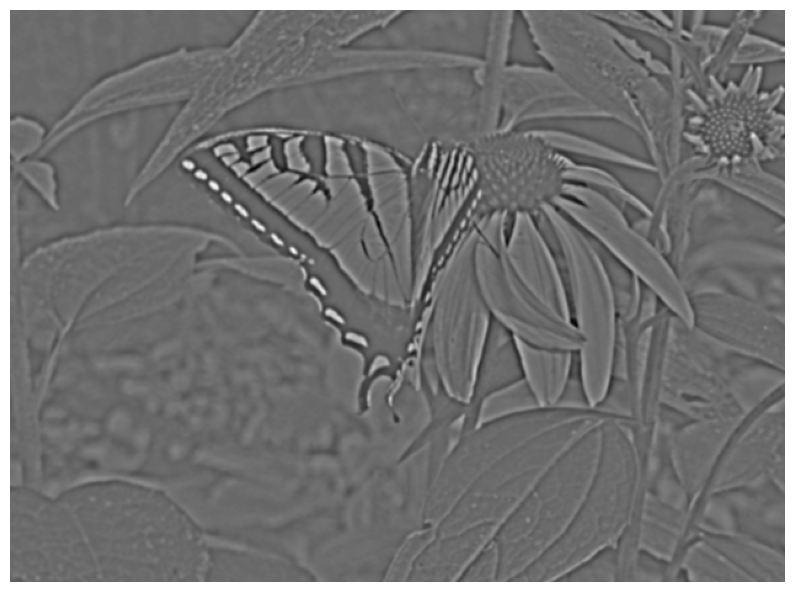

In [12]:
base_image_file='asdf/bbsk081604_all.asdf'

im=pi5.filtered_images(
                    base_image_file,
                    {'type':'dog','sd1':1,'sd2':3},
                    {'type':'norm'},
                    )

save_image(im,'/Users/bblais/Downloads/im.png')



Using cache_images/cache_images_338f2f61446cbe5f5bd0611c2632d718.asdf from cache.Using cache_images/cache_images_da60254d771681a3b145e3fe8fc17730.asdf from cache.

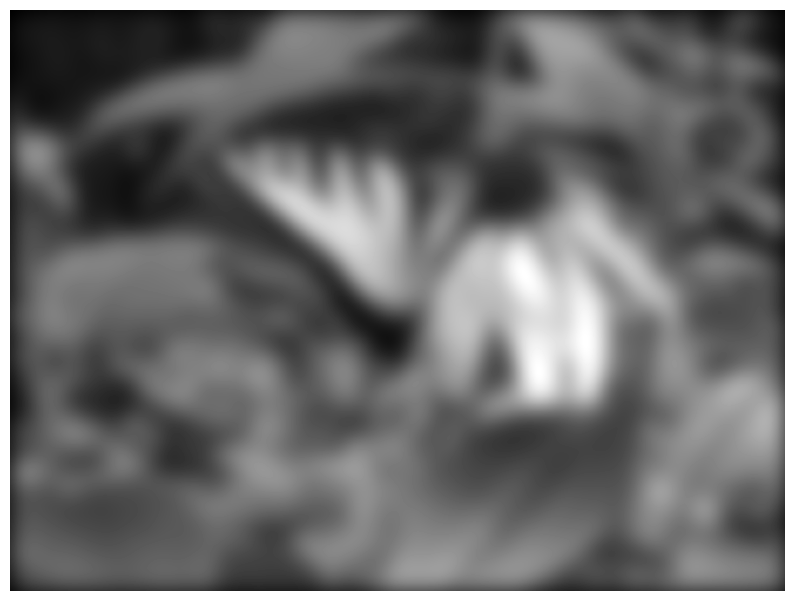

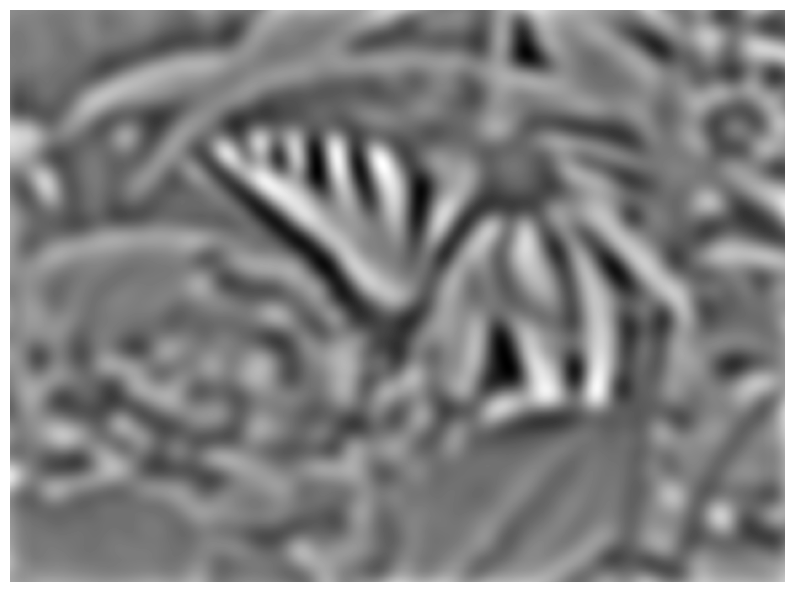

In [18]:
base_image_file='asdf/bbsk081604_all.asdf'

bv=10


im=pi5.filtered_images(
                        base_image_file,
                        {'type':'blur','size':bv},
                        )

figure()
save_image(im,'/Users/bblais/Downloads/im_blur0.png')


im=pi5.filtered_images(
                        base_image_file,
                        {'type':'blur','size':bv},
                        {'type':'dog','sd1':1,'sd2':3},
                        {'type':'norm'},
                        )
figure()
im_blur1=save_image(im,'/Users/bblais/Downloads/im_blur1.png')



Using cache_images/cache_images_d92550cfb1ef2604facfb73e3418fe0e.asdf from cache.

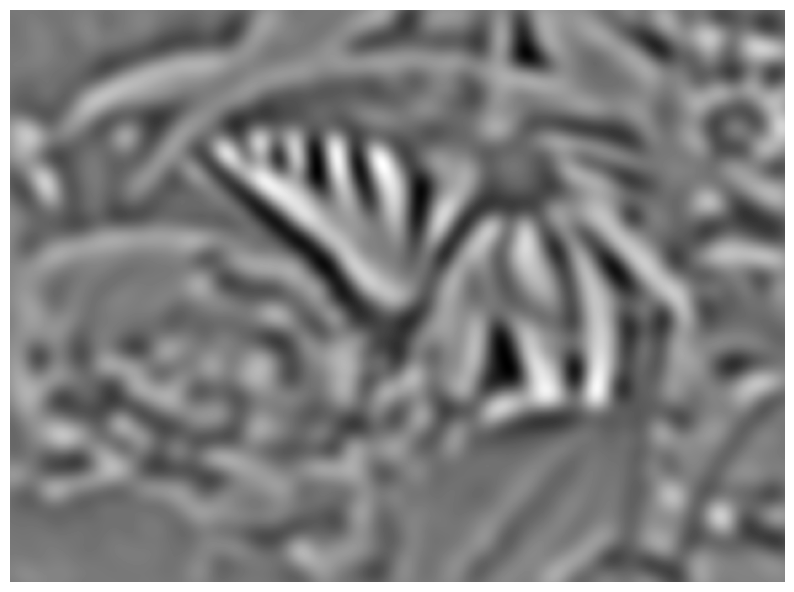

In [19]:
im=pi5.filtered_images(
                        base_image_file,
                        {'type':'dog','sd1':1,'sd2':3},
                        {'type':'norm'},
                        {'type':'blur','size':bv},
                        )
figure()
im_blur2=save_image(im,'/Users/bblais/Downloads/im_blur2.png')


/Users/bblais/tmp/ipykernel_61568/3088731423.py:6: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  colorbar(orientation='horizontal')
/Users/bblais/tmp/ipykernel_61568/3088731423.py:13: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  colorbar(orientation='horizontal')


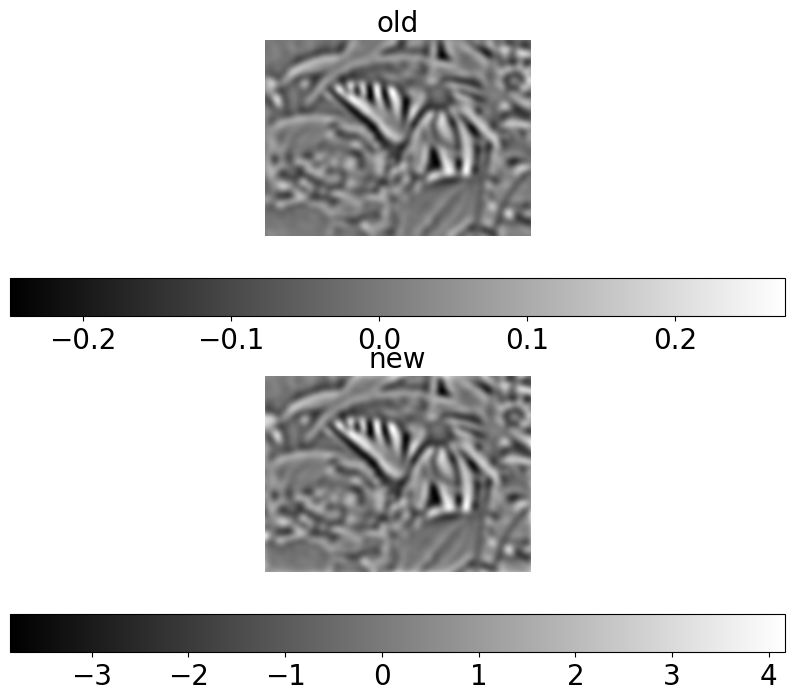

In [28]:
subplot(2,1,1)
grid(False)
imshow(im_blur2,cmap=plt.cm.gray)
title('old')
axis('off')
colorbar(orientation='horizontal')

subplot(2,1,2)
grid(False)
imshow(im_blur1,cmap=plt.cm.gray)
title('new')
axis('off')
colorbar(orientation='horizontal')


In [29]:
im1.shape

(465, 630)

In [36]:
shape=[int(_*.2) for _ in im1.shape]

In [37]:
imsave('/Users/bblais/Downloads/noise.png',randn(*shape),cmap=plt.cm.gray)

array([[ 19.84435798,  20.12840467,  16.14396887, ...,  19.52918288,
         20.68093385,  24.692607  ],
       [ 18.6381323 ,  17.71206226,  16.71595331, ...,  21.56809339,
         21.86381323,  22.48638132],
       [ 17.57198444,  16.57587549,  16.57587549, ...,  21.50194553,
         22.43968872,  22.9922179 ],
       ...,
       [ 26.07782101,  24.        ,  22.60311284, ..., 118.3463035 ,
        122.25680934, 122.9688716 ],
       [ 22.307393  ,  21.07782101,  19.59922179, ..., 112.38521401,
        116.38521401, 118.88326848],
       [ 18.70428016,  18.75486381,  17.98832685, ..., 110.02723735,
        116.74319066, 118.16731518]])

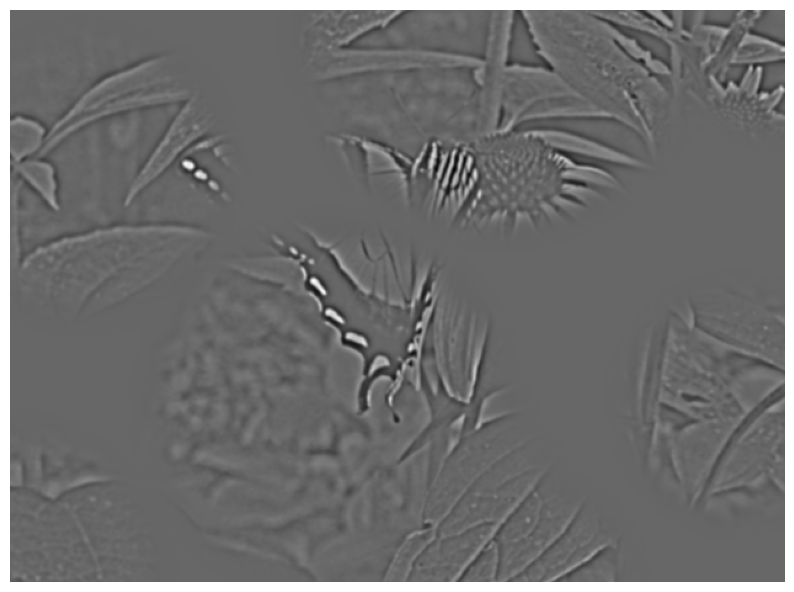

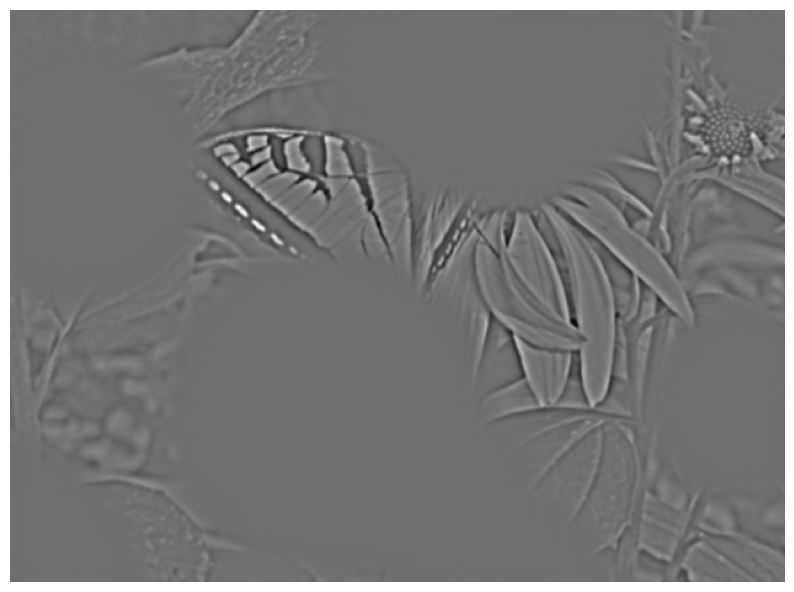

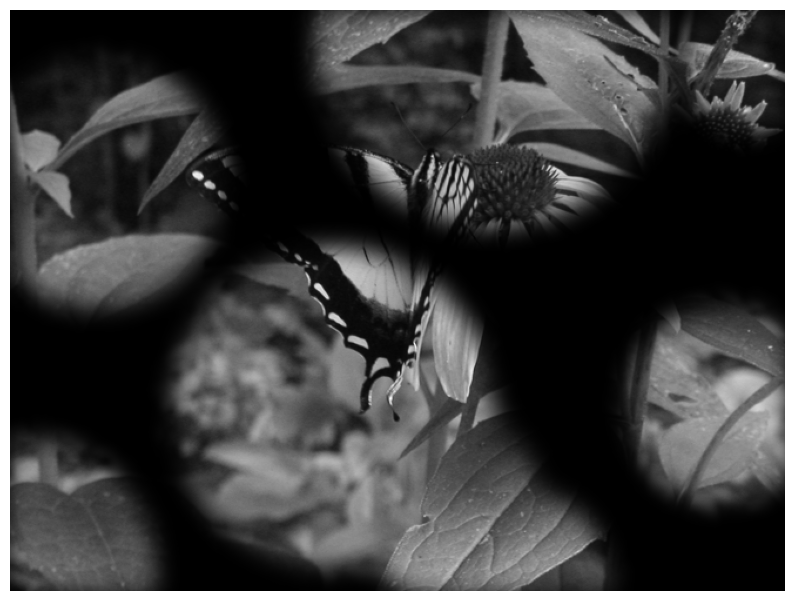

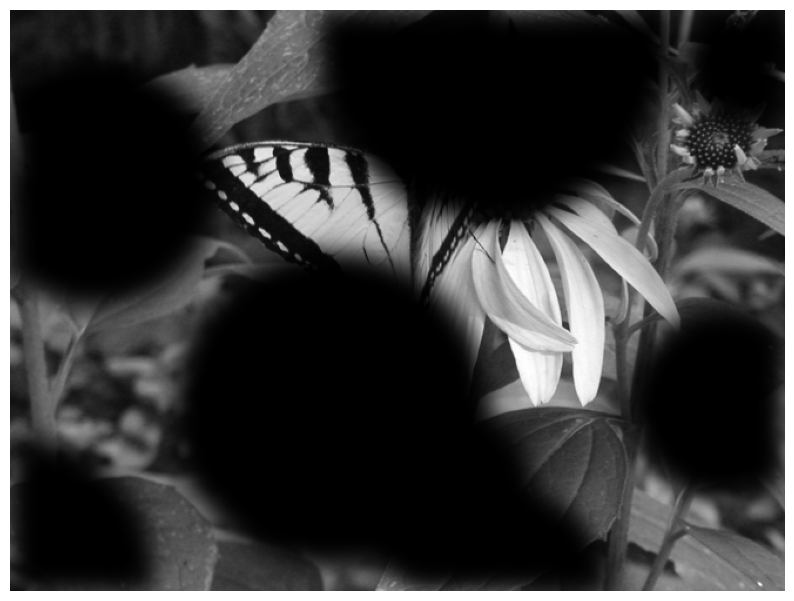

In [41]:
f=10
maskA_fname=pi5.filtered_images(base_image_file,
                            {'type':'mask',
                             'name':'bblais-masks-20210615/2021-06-15-*-A-fsig%d.png' % f,
                            'seed':101},
                            {'type':'dog','sd1':1,'sd2':3},
                            {'type':'norm'},                                            
                                verbose=False,
                          )
maskF_fname=pi5.filtered_images(base_image_file,
                            {'type':'mask',
                             'name':'bblais-masks-20210615/2021-06-15-*-F-fsig%d.png' % f,
                            'seed':101},
                            {'type':'dog','sd1':1,'sd2':3},
                            {'type':'norm'},                                            
                                verbose=False,
                          )

figure()
ima=save_image(maskA_fname,'/Users/bblais/Downloads/im_maskA_dog.png')
figure()
imf=save_image(maskF_fname,'/Users/bblais/Downloads/im_maskF_dog.png')



f=10
maskA_fname=pi5.filtered_images(base_image_file,
                            {'type':'mask',
                             'name':'bblais-masks-20210615/2021-06-15-*-A-fsig%d.png' % f,
                            'seed':101},
                                verbose=False,
                          )
maskF_fname=pi5.filtered_images(base_image_file,
                            {'type':'mask',
                             'name':'bblais-masks-20210615/2021-06-15-*-F-fsig%d.png' % f,
                            'seed':101},
                                verbose=False,
                          )

figure()
save_image(maskA_fname,'/Users/bblais/Downloads/im_maskA.png')
figure()
save_image(maskF_fname,'/Users/bblais/Downloads/im_maskF.png')



In [45]:
imsave('/Users/bblais/Downloads/im_maskF_dog_contrast.png',imf,cmap=plt.cm.gray,
      vmin=-30,vmax=30)

In [42]:
imf.min()

-10.633514209021282

In [43]:
imf.max()

13.618736764767121

In [44]:
imsave?

Signature: imsave(fname, arr, **kwargs)
Docstring:
Save an array as an image file.

Parameters
----------
fname : str or path-like or file-like
    A path or a file-like object to store the image in.
    If *format* is not set, then the output format is inferred from the
    extension of *fname*, if any, and from :rc:`savefig.format` otherwise.
    If *format* is set, it determines the output format.
arr : array-like
    The image data. The shape can be one of
    MxN (luminance), MxNx3 (RGB) or MxNx4 (RGBA).
vmin, vmax : float, optional
    *vmin* and *vmax* set the color scaling for the image by fixing the
    values that map to the colormap color limits. If either *vmin*
    or *vmax* is None, that limit is determined from the *arr*
    min/max value.
cmap : str or `~matplotlib.colors.Colormap`, default: :rc:`image.cmap`
    A Colormap instance or registered colormap name. The colormap
    maps scalar data to colors. It is ignored for RGB(A) data.
format : str, optional
    The file